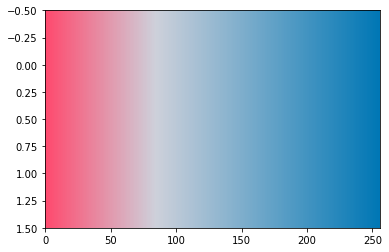

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Settings

mpl.rcParams.update({
    "legend.fancybox": False
})

colors = {
    'blue': '#0077b5',
    'pink': '#de00a5',
    'salmon': '#ff4a6e',
    'purple': '#8700cd',
    'green': '#45cc37',
    'yellow': '#fecb51',
    'gray': '#727377',
    'lightgray': '#ced1db'
}


grad = [(0,colors['salmon']), 
        (.33,colors['lightgray']), 
        (1,colors['blue'])]
test = mpl.colors.LinearSegmentedColormap.from_list('custom', grad)

plt.imshow(gradient, aspect='auto', cmap=test)

In [2]:
# Load data
collection = pd.read_csv("tate/paintings.csv", index_col=0)

collection['ratio'] = collection['width'] / collection['height']
collection

,artist,title,year,groundtruth,height,width,ratio
T13896,John Constable,Salisbury Cathedral from the Meadows,1831,L,1537,1920,1.249187
T05010,Pablo Picasso,Weeping Woman,1937,O,608,500,0.822368
N05915,Pablo Picasso,Bust of a Woman,1909,P,727,600,0.825309
N00530,Joseph Mallord William Turner,Snow Storm - Steam-Boat off a Harbour’s Mouth,1842,L,914,1219,1.333698
T00598,Richard Dadd,The Fairy Feller’s Master-Stroke,1855,O,540,394,0.729630
...,...,...,...,...,...,...,...
N05609,Maurice Sterne,Mexican Church Interior,1934,O,1283,1022,0.796571
T14823,Unknown artist,Leon Trotsky,1980,P,510,480,0.941176
AL00397,Louise Bourgeois,Untitled,1946,O,660,1116,1.690909
T14824,Unknown artist,Leon Trotsky,1980,P,638,511,0.800940


In [3]:
iland = collection['ratio'] >= 1.2
iport = collection['ratio'] <= .8
irest = (~iland) & (~iport)

collection['model'] = 'O'
collection.loc[iland,'model'] = 'L'
collection.loc[iport,'model'] = 'P'

collection

,artist,title,year,groundtruth,height,width,ratio,model
T13896,John Constable,Salisbury Cathedral from the Meadows,1831,L,1537,1920,1.249187,L
T05010,Pablo Picasso,Weeping Woman,1937,O,608,500,0.822368,O
N05915,Pablo Picasso,Bust of a Woman,1909,P,727,600,0.825309,O
N00530,Joseph Mallord William Turner,Snow Storm - Steam-Boat off a Harbour’s Mouth,1842,L,914,1219,1.333698,L
T00598,Richard Dadd,The Fairy Feller’s Master-Stroke,1855,O,540,394,0.729630,P
...,...,...,...,...,...,...,...,...
N05609,Maurice Sterne,Mexican Church Interior,1934,O,1283,1022,0.796571,P
T14823,Unknown artist,Leon Trotsky,1980,P,510,480,0.941176,O
AL00397,Louise Bourgeois,Untitled,1946,O,660,1116,1.690909,L
T14824,Unknown artist,Leon Trotsky,1980,P,638,511,0.800940,O


In [4]:
collection[collection['groundtruth'] == 'L'].sort_values('ratio')[:5]

,artist,title,year,groundtruth,height,width,ratio,model
N06011,Ruskin Spear,Mr Hollingbery’s Canary,1950,L,1829,1071,0.585566,P
N05037,John Nash,"The Moat, Grange Farm, Kimble",1922,L,762,508,0.666667,P
T11976,Ged Quinn,Cross in the Wilderness,2003,L,2668,1828,0.685157,P
T12865,"Sir John Everett Millais, Bt",Dew-Drenched Furze,1889,L,1732,1230,0.710162,P
N00302,Richard Wilson,Hadrian’s Villa,1765,L,356,254,0.713483,P


In [5]:
collection[collection['groundtruth'] == 'P'].sort_values('ratio')[-5:]

,artist,title,year,groundtruth,height,width,ratio,model
N04132,Joseph Wright of Derby,Sir Brooke Boothby,1781,P,1486,2076,1.397039,L
T02263,George Carline,Under a Midsummer Sun,1889,P,257,362,1.408560,L
T00058,Sir Peter Lely,Two Ladies of the Lake Family,1660,P,1270,1810,1.425197,L
N06244,Sir Joshua Reynolds,Lord and Lady Ashburton,1782,P,1295,1886,1.456371,L
T03348,Bernard Meninsky,Sleeping Woman in a Landscape,1945,P,613,1070,1.745514,L


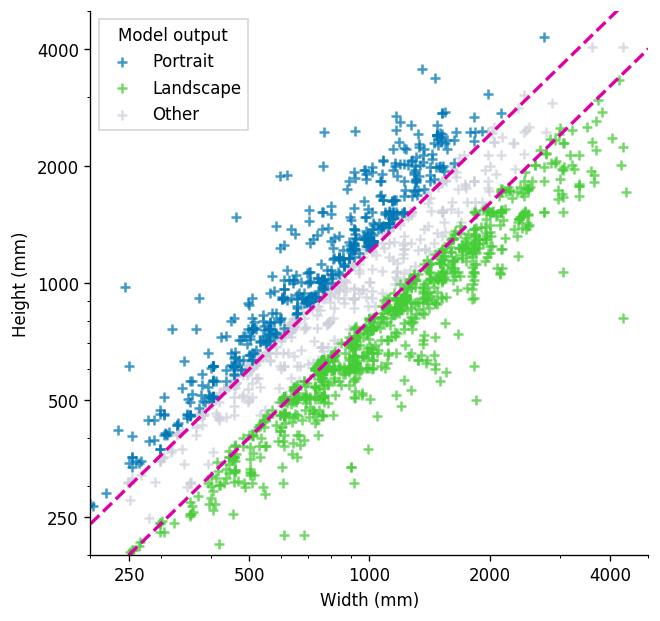

In [7]:
fig, ax = plt.subplots(figsize=(6,6), dpi=120)

ax.set_xlabel('Width (mm)')
ax.set_ylabel('Height (mm)')

ax.set_xlim(200, 5000)
ax.set_ylim(200, 5000)

ax.set_xscale('log')
ax.set_yscale('log')

for ix, name, col in zip([irest,iland,iport],['Other','Landscape','Portrait'],['lightgray','green','blue']):
    ax.scatter(collection[ix]['width'], collection[ix]['height'], 
               label=name, marker='+', c=colors[col], alpha=.75)

ax.plot([200,5000], [200*1.2,5000*1.2], color=colors['pink'], ls='--', lw=2 )
ax.plot([200,5000], [200*.8,5000*.8], color=colors['pink'], ls='--', lw=2 )

# ax.get_xaxis().get_major_formatter().labelOnlyBase = False
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([250, 500,1000,2000,4000])
ax.set_yticks([250, 500,1000,2000,4000])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Reverse legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Model output')

pass

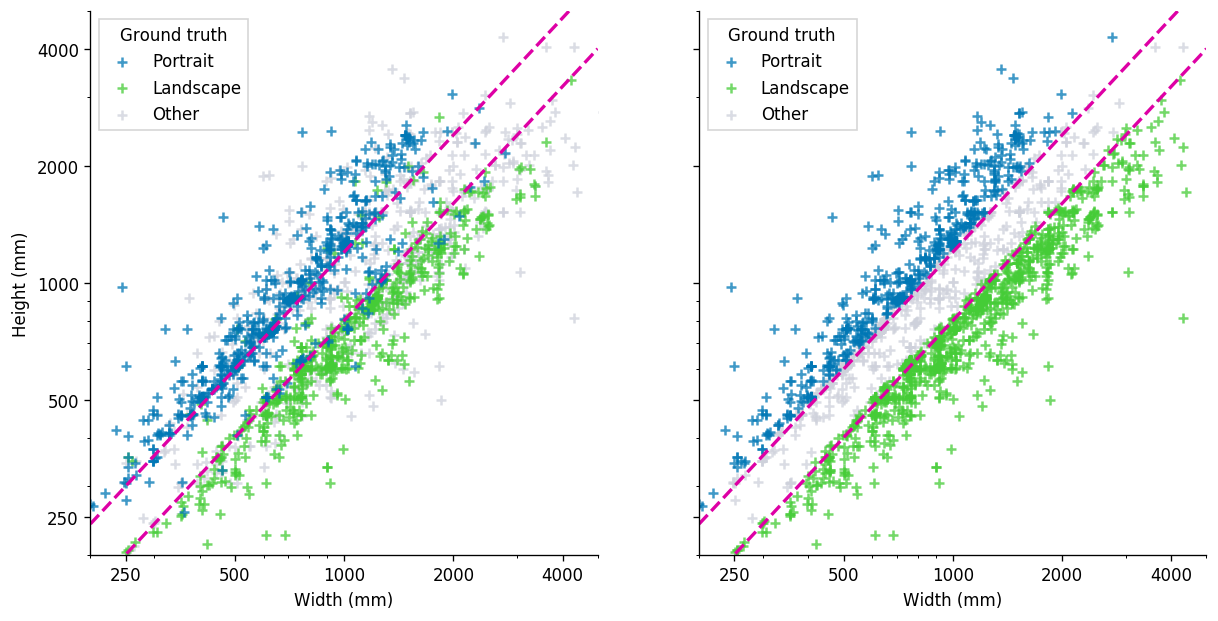

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,6), dpi=120, sharey=True)

ax1, ax2 = axes

ax1.set_ylabel('Height (mm)')
for ax in axes:
    ax.set_xlabel('Width (mm)')

    ax.set_xlim(200, 5000)
    ax.set_ylim(200, 5000)

    ax.set_xscale('log')
    ax.set_yscale('log')

tland = collection['groundtruth'] == 'L'
tport = collection['groundtruth'] == 'P'
trest = (~tland) & (~tport)

for ix, name, col in zip([trest,tland,tport],['Other','Landscape','Portrait'],['lightgray','green','blue']):
    ax1.scatter(collection[ix]['width'], collection[ix]['height'], 
               label=name, marker='+', c=colors[col], alpha=.75)

for ix, name, col in zip([irest,iland,iport],['Other','Landscape','Portrait'],['lightgray','green','blue']):
    ax2.scatter(collection[ix]['width'], collection[ix]['height'], 
               label=name, marker='+', c=colors[col], alpha=.75)    
    
for ax, titel in zip(axes, ['Ground truth', 'Model output']):
    ax.plot([200,5000], [200*1.2,5000*1.2], color=colors['pink'], ls='--', lw=2 )
    ax.plot([200,5000], [200*.8,5000*.8], color=colors['pink'], ls='--', lw=2 )

    ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.set_xticks([250, 500,1000,2000,4000])
    ax.set_yticks([250, 500,1000,2000,4000])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Reverse legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='Ground truth')


pass

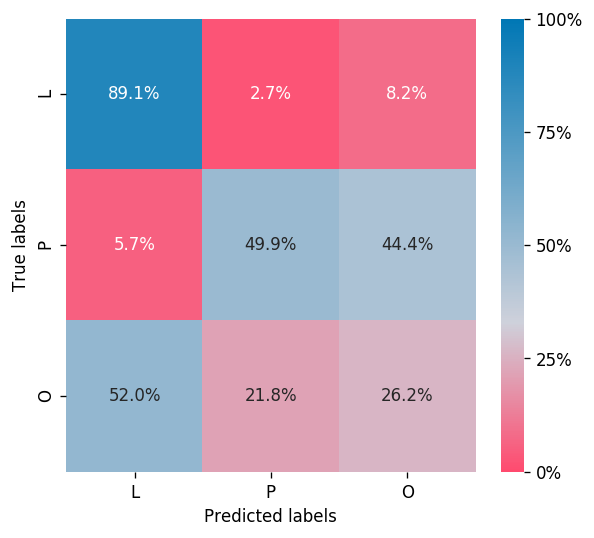

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

truth = collection['groundtruth']
pred = collection['model']
C = confusion_matrix(truth, pred, labels=['L','P','O'], normalize='true')

fig, ax = plt.subplots(figsize=(5.5,5), dpi=120)
sns.heatmap(C, annot=True, fmt='.1%', ax=ax, cmap=test, vmin=0, vmax=1) 

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['L', 'P', 'O']);
ax.yaxis.set_ticklabels(['L', 'P', 'O'])

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .5, .75, 1])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])